In [3]:
import pandas as pd
import sklearn

In [7]:
df = pd.read_csv('output.csv') #hier eigene Daten

print(df['activity label'].nunique())
print(df['concept:name'].nunique())
print(df['CO_rule'].nunique())

print(df['AT_rule'].unique())
print('-'*60)
print(df['CT_rule'].unique())
print('-'*60)
print(df['TT_rule'].unique())
print('-'*60)
print(df['CO_rule'].unique())

df

118
154
12
["(`at:phase` ELEMENT OF {'01_HOOFD_6'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_7'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_8'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_2'})"
 "(`at:phase` ELEMENT OF {'01_HOOFD_3'})"]
------------------------------------------------------------
['T(NULL)']
------------------------------------------------------------
["(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu', 'Tue', 'Wed'})"
 "(`tt:weekday` ELEMENT OF {'Fri'})" "(`tt:weekday` ELEMENT OF {'Sat'})"]
------------------------------------------------------------
["(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_6'}) AND (`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu', 'Tue', 'Wed'})"
 "(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_7'}) AND (`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu', 'Tue', 'Wed'})"
 "(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOFD_8'}) AND (`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu', 'Tue', 'We

,Unnamed: 0,case:concept:name,activity label,org:resource,time:timestamp,ct:last_phase,case_parts,concept:name,r:municipality,ct:permit_type,at:phase,tt:month,tt:day,tt:weekday,tt:ampm,AT_rule,CT_rule,TT_rule,CO_rule
0,16631,3462821,enter senddate continuation,560589,2011-06-22 06:00:00+0000,Procedure afgebroken,Bouw,01_HOOFD_600_2,muni-1,Bouw,01_HOOFD_6,Jun,Day_21,Tue,PM,(`at:phase` ELEMENT OF {'01_HOOFD_6'}),T(NULL),"(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu',...",(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
1,16648,3462821,send continuation letter,560589,2011-06-22 17:52:04+0000,Procedure afgebroken,Bouw,01_HOOFD_600_1,muni-1,Bouw,01_HOOFD_6,Jun,Day_22,Wed,AM,(`at:phase` ELEMENT OF {'01_HOOFD_6'}),T(NULL),"(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu',...",(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
2,81947,3657921,enter senddate continuation,560458,2011-05-03 06:00:00+0000,Zaak afgehandeld,Bouw,01_HOOFD_600_2,muni-2,Bouw,01_HOOFD_6,May,Day_2,Mon,PM,(`at:phase` ELEMENT OF {'01_HOOFD_6'}),T(NULL),"(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu',...",(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
3,81950,3657921,send continuation letter,560458,2011-05-03 23:34:09+0000,Zaak afgehandeld,Bouw,01_HOOFD_600_1,muni-2,Bouw,01_HOOFD_6,May,Day_3,Tue,PM,(`at:phase` ELEMENT OF {'01_HOOFD_6'}),T(NULL),"(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu',...",(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
4,99138,3197901,enter senddate continuation,2013365,2011-03-16 08:00:00+0000,Advies bekend,Bouw,01_HOOFD_600_2,muni-3,Bouw,01_HOOFD_6,Mar,Day_15,Tue,PM,(`at:phase` ELEMENT OF {'01_HOOFD_6'}),T(NULL),"(`tt:weekday` ELEMENT OF {'Mon', 'Sun', 'Thu',...",(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193448,250353,7862057,register submission date request,560752,2013-01-20 08:00:00+0000,Buiten behandeling gelaten,Bouw,01_HOOFD_010,muni-5,Bouw,01_HOOFD_0,Jan,Day_19,Sat,PM,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193449,253894,8349696,register submission date request,560602,2013-03-31 08:00:00+0000,Vergunning ingetrokken,"Handelen in strijd met regels RO,Milieu (vergu...",01_HOOFD_010,muni-5,Non Bouw,01_HOOFD_0,Mar,Day_30,Sat,PM,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193450,254744,8518475,register submission date request,560602,2013-04-21 06:00:00+0000,Zaak afgehandeld,Bouw,01_HOOFD_010,muni-5,Bouw,01_HOOFD_0,Apr,Day_20,Sat,PM,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...
193451,261191,9754728,register submission date request,8492512,2013-11-24 08:00:00+0000,Zaak afgehandeld,Bouw,01_HOOFD_010,muni-5,Bouw,01_HOOFD_0,Nov,Day_23,Sat,PM,"(`at:phase` ELEMENT OF {'01_HOOFD_0', '01_HOOF...",T(NULL),(`tt:weekday` ELEMENT OF {'Sat'}),(T(NULL)) AND (`at:phase` ELEMENT OF {'01_HOOF...


In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from math import log

#X1 = df.groupby(['Resource', 'Activity']).size().unstack().fillna(0)
#X2 = df.groupby(['Resource', 'CO']).size().unstack().fillna(0)
X1 = df.groupby(['org:resource', 'concept:name']).size().unstack().fillna(0) #concept name = activity
X2 = df.groupby(['org:resource', 'CO_rule']).size().unstack().fillna(0)
#X = X.applymap(lambda x: log(x + 1))

best_k = -1
best_score = -2

# for k in range(2, len(X)):
#     clu = AgglomerativeClustering(n_clusters=k).fit_predict(X)
#     ss = silhouette_score(X, clu)
#     if ss > best_score:
#         best_score = ss
#         best_k = k
# print(best_k)

# clu = AgglomerativeClustering(n_clusters=best_k).fit_predict(X)
# print(best_k)
# print(silhouette_score(X, clu))

l_ss1 = []
l_ss2 = []
for k in range(2, len(X1)):
    clu1 = AgglomerativeClustering(n_clusters=k).fit_predict(X1)
    ss1 = silhouette_score(X1, clu1)
    l_ss1.append(ss1)
    clu2 = AgglomerativeClustering(n_clusters=k).fit_predict(X2)
    ss2 = silhouette_score(X2, clu2)
    l_ss2.append(ss2)

data = []
for i in range(len(l_ss1)):
    data.append({'k': i + 2, 'score': l_ss2[i], 'matrix based on': 'Execution Context'})
    data.append({'k': i + 2, 'score': l_ss1[i], 'matrix based on': 'Activity'})

data = pd.DataFrame(data)

data

,k,score,matrix based on
0,2,0.725881,Execution Context
1,2,0.610249,Activity
2,3,0.700242,Execution Context
3,3,0.643522,Activity
4,4,0.696675,Execution Context
...,...,...,...
133,68,0.022804,Activity
134,69,0.042254,Execution Context
135,69,0.013330,Activity
136,70,0.000000,Execution Context


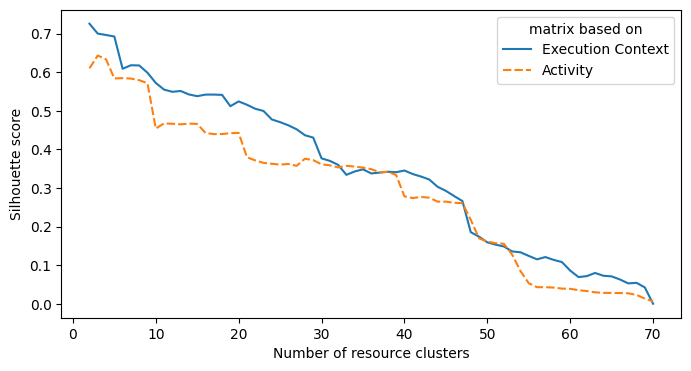

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.lineplot(data=data, x="k", y="score", ax=ax, hue="matrix based on", style='matrix based on')
plt.xlabel('Number of resource clusters')
plt.ylabel("Silhouette score")
plt.show()
f.savefig("plot2.pdf", bbox_inches='tight')